<a href="https://colab.research.google.com/github/osamamohamaed/-house_price-22/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, QuantileRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from google.colab import files
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/house_price_regression_dataset (2) (1).csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [ ]:
df.head(10)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
6,3671,1,2,2012,4.911960,0,1,8.144279e+05
7,3419,1,1,1972,2.805281,1,1,7.034131e+05
8,630,3,3,1997,1.014286,1,8,1.738750e+05
9,2185,4,2,1981,3.941604,2,5,5.041765e+05


In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.isna().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Age_of_house'] = 2025 - df['Year_Built']

In [ ]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Age_of_house
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,44
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,9
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,9
3,966,1,2,1977,2.730667,1,8,2.296989e+05,48
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,32
...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,47
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,26
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,63
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,75


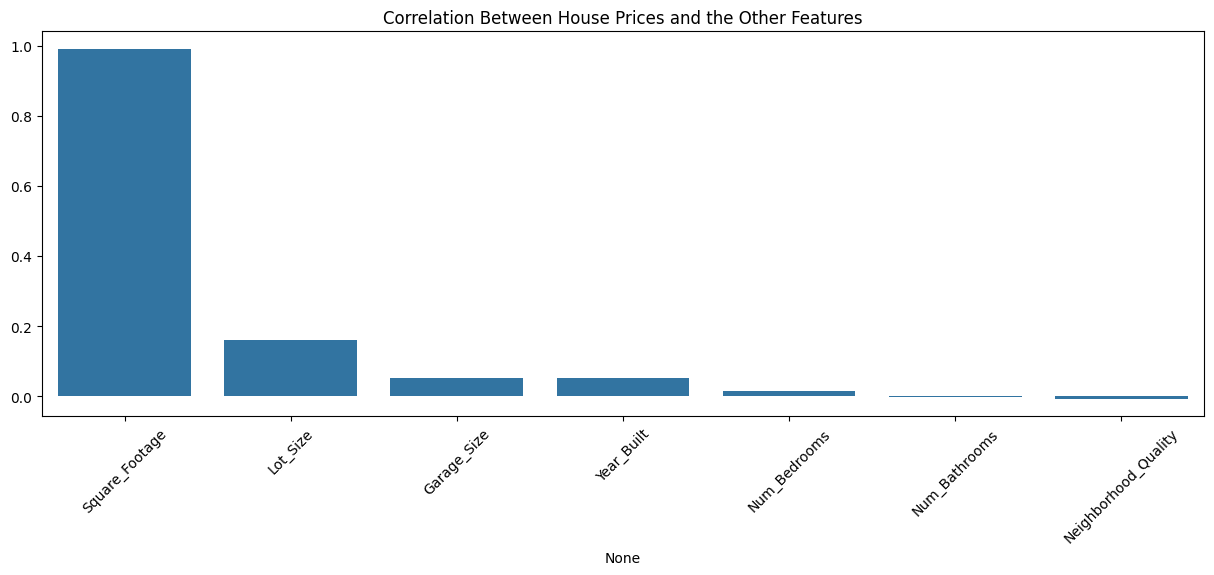

In [ ]:
correlations_with_houseprice = df.corr()['House_Price'].drop('House_Price')
correlations_with_houseprice = correlations_with_houseprice.sort_values(ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=correlations_with_houseprice.index, y= correlations_with_houseprice.values)
plt.title('Correlation Between House Prices and the Other Features')
plt.xticks(rotation=45)
plt.show()

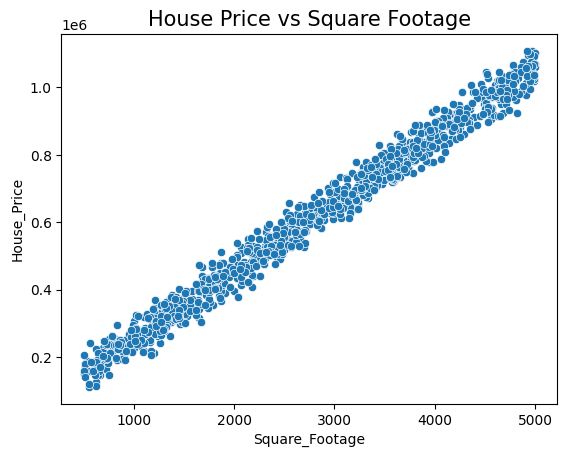

In [ ]:
sns.scatterplot(x='Square_Footage',y='House_Price',data=df)
plt.title('House Price vs Square Footage',fontsize=15)
plt.show()

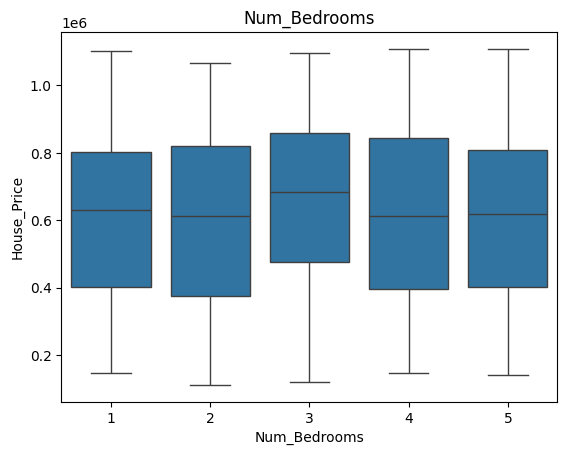

In [ ]:
sns.boxplot(x=df['Num_Bedrooms'],y=df['House_Price'])
plt.title("Num_Bedrooms")
plt.show()

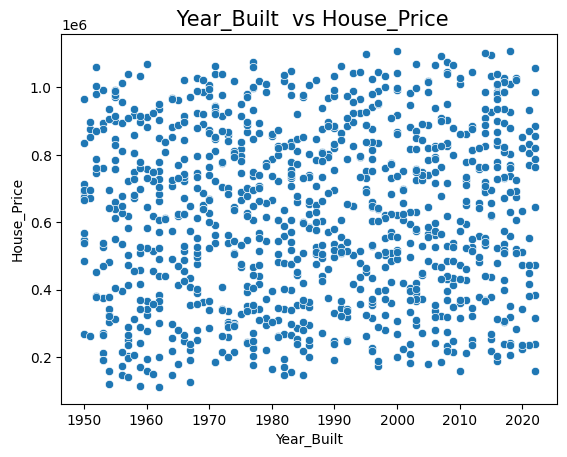

In [ ]:
sns.scatterplot(x='',y='House_Price',data=df)
plt.title(' Lot_Size  vs Square Footage',fontsize=15)
plt.show()


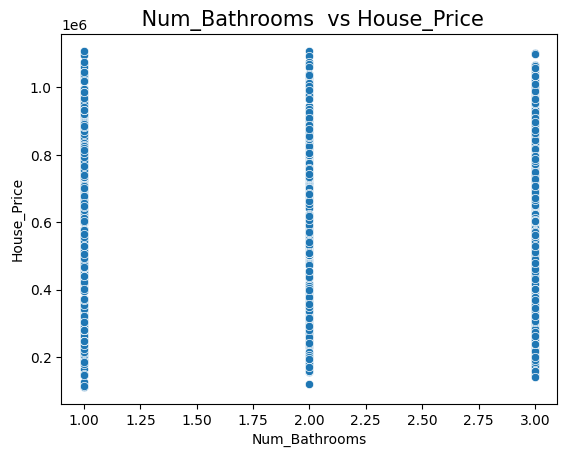

In [ ]:
sns.scatterplot(x='Num_Bathrooms',y='House_Price',data=df)
plt.title(' Num_Bathrooms  vs House_Price',fontsize=15)
plt.show()

In [ ]:
features = df.drop(columns=['House_Price'])
target = df['House_Price']

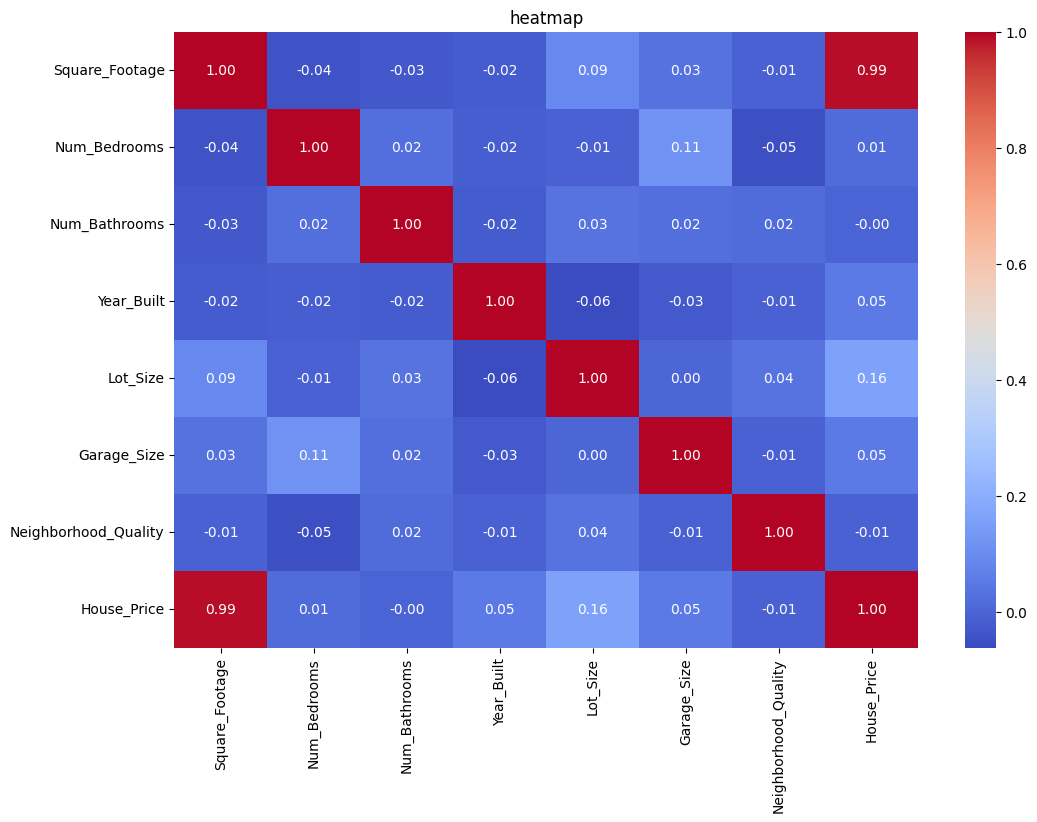

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True , cmap='coolwarm', fmt='.2f' )
plt.title("heatmap")
plt.show()

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [ ]:
X_train ,  X_test ,y_train ,y_test =train_test_split(features, target,test_size=0.2 , random_state=29)

In [ ]:

decision_reg= DecisionTreeRegressor(max_depth=14 , random_state=29)
decision_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, random_state=29)

In [ ]:
y_pred_tree=decision_reg.predict(X_test)

In [ ]:
mae_tree= mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test , y_pred_tree)
print("MAE:", mae_tree)
print("MSE:", mse_tree)
print("r2 score:" , r2_tree)

MAE: 22715.484514800635
MSE: 836413609.375424
r2 score: 0.9864586253981787


##random forest (our data)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=29)

rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=29)

In [ ]:
rf_model_pred = rf_model.predict(X_test_scaled)
rf_model_pred

array([ 628491.41270087, 1052206.93750361,  650316.57458837,
        453054.88774705,  209113.65333527,  319780.01830544,
        757199.17083739,  847492.56171896,  532622.64890189,
        907880.37508879,  487810.12688799,  525271.71257851,
        908227.20532132,  420563.73428225,  231200.40263918,
        721070.5241086 ,  760547.03332778, 1027069.94368408,
        902730.98457449,  328093.61233449,  999505.06327899,
        526351.10601354,  818928.48220512,  182263.96708401,
        653000.61755618, 1042229.76329721,  780312.6392802 ,
        353348.51222916,  817520.19232647,  444081.28404996,
        377852.90481925,  721576.74085259,  919898.80018616,
        677010.24542002,  996309.07828611,  612163.8034723 ,
        817397.365187  ,  621010.11186214,  233275.10020942,
        675117.8892148 , 1021742.91157912,  851256.95049781,
        337669.36430723,  804148.97965735,  332101.40069361,
        743120.41526185,  857930.4660563 ,  599213.47605068,
        962561.77265204,

In [ ]:
y_test

,House_Price
795,6.911139e+05
973,1.034380e+06
794,6.415270e+05
694,4.621857e+05
587,1.460204e+05
...,...
374,7.208837e+05
137,4.920183e+05
970,1.009807e+06
989,4.607412e+05


In [ ]:
mae_forest = mean_absolute_error(y_test, rf_model_pred)
mse_forest = mean_squared_error(y_test, rf_model_pred)

r2_forest = r2_score(y_test, rf_model_pred)

mae_forest,mse_forest,r2_forest

(16768.577156492192, 444037269.3855482, 0.9928111224703654)

['Decision Tree', 22715.484514800635, 836413609.375424, 0.9864586253981787, ['random fores ', 16768.577156492192, 444037269.3855482, 0.9928111224703654]]


##Gradient Boosting Regressor

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
X_train ,  X_test ,y_train ,y_test =train_test_split(features, target,test_size=0.2 , random_state=29)

In [ ]:
Gradient_reg = GradientBoostingRegressor(random_state=29)
Gradient_reg.fit(X_train , y_train)


GradientBoostingRegressor(random_state=29)

In [ ]:
y_pred_grad = Gradient_reg.predict(X_test)

In [ ]:
mae_g= mean_absolute_error(y_test , y_pred_grad)
mse_g= mean_squared_error(y_test, y_pred_grad)

r2_g= r2_score(y_test , y_pred_grad)
print('mae : ' , mae_g )
print('mae : ' , mse_g )
print('r2 score :' , r2_g)



mae :  12366.866715613596
mae :  228304391.42570838
r2 score : 0.9963037960491282


##XGBoost Regressor

In [ ]:
import xgboost as xgb


In [ ]:
xgb_model= xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=29)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb=xgb_model.predict(X_test)

In [ ]:
mae_xgb=mean_absolute_error(y_test,y_pred_xgb )
mse_xgb =mean_squared_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

r2=r2_score(y_test,y_pred_xgb)
print('mae : ' , mae_xgb )
print("mse :" ,mse_xgb)
print('r2 score :' , r2)


mae :  14870.860011247518
mse : 349779014.36598986
r2 score : 0.9943371453927888


##LightGBM Regressor

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor


In [ ]:
X_train ,  X_test ,y_train ,y_test =train_test_split(features, target,test_size=0.2 , random_state=29)

In [ ]:
hgb_model = LGBMRegressor(max_iter=100 , learning_rate=0.1 , random_state=29)
hgb_model.fit(X_train , y_train)

[LightGBM] [Warning] num_iterations is set=100, max_iter=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score 614883.804307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

LGBMRegressor(max_iter=100, random_state=29)

In [ ]:
y_pred_light=hgb_model.predict(X_test)

In [ ]:
mae= mean_absolute_error(y_test, y_pred_light)
mse = mean_squared_error(y_test, y_pred_light)
r2 = r2_score(y_test , y_pred_light)
print("MAE:", mae)
print("MSE:", mse)

print("r2 score:" , r2)

MAE: 12732.481574911219
MSE: 245854890.12745085
r2 score: 0.996019656868817


##CatBoost Regressor

In [ ]:
import math
import pandas as pd
from sklearn.datasets import load_iris
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [ ]:
X_train ,  X_test ,y_train ,y_test =train_test_split(features, target,test_size=0.2 , random_state=29)

In [ ]:
CatBoost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE')
CatBoost_model.fit(X_train, y_train)

0:	learn: 233096.8659402	total: 1.64ms	remaining: 163ms
1:	learn: 216336.1178742	total: 2.98ms	remaining: 146ms
2:	learn: 197661.8669468	total: 3.85ms	remaining: 124ms
3:	learn: 182559.5676089	total: 4.77ms	remaining: 114ms
4:	learn: 168458.0636830	total: 5.6ms	remaining: 106ms
5:	learn: 154278.2005495	total: 6.4ms	remaining: 100ms
6:	learn: 141285.0298853	total: 7.18ms	remaining: 95.4ms
7:	learn: 130889.2107114	total: 7.99ms	remaining: 91.9ms
8:	learn: 120990.8721615	total: 8.75ms	remaining: 88.5ms
9:	learn: 111431.8274554	total: 9.29ms	remaining: 83.6ms
10:	learn: 103482.0722298	total: 9.82ms	remaining: 79.5ms
11:	learn: 95814.9436415	total: 10.6ms	remaining: 77.7ms
12:	learn: 87786.4022197	total: 11.4ms	remaining: 76.2ms
13:	learn: 81657.8503116	total: 12.1ms	remaining: 74.4ms
14:	learn: 75942.2308545	total: 13ms	remaining: 73.7ms
15:	learn: 70808.1967046	total: 13.9ms	remaining: 73ms
16:	learn: 65712.2363595	total: 14.7ms	remaining: 71.9ms
17:	learn: 60718.3214346	total: 15.5ms	rem

In [ ]:
y_pred_cat= CatBoost_model.predict(X_test)

In [ ]:
mae= mean_absolute_error(y_test, y_pred_cat)
mse = mean_squared_error(y_test, y_pred_cat)
r2 = r2_score(y_test , y_pred_cat)
print("MAE:", mae)
print("MSE:", mse)
print("r2 score:" , r2)

MAE: 11557.166995691965
MSE: 218033315.53377998
r2 score: 0.9964700827817415


##KNeighbors Regressor





In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression


In [ ]:
features , target= make_regression(n_samples=100, n_features=1, noise=0.1, random_state=29)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)


In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_regressor.predict(X_test)


In [ ]:
mae= mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test , y_pred_knn)
print("MAE:", mae)
print("MSE:", mse)
print("r2 score:" , r2)

MAE: 26462.4463018744
MSE: 1041374483.9667166
r2 score: 0.9831403484710133


##SVR

In [ ]:
from sklearn.svm import SVR


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svr_model =  SVR(kernel='linear', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR(C=100, kernel='linear')

In [ ]:
y_pred_svr=svr_model.predict(X_test)

In [ ]:
mae_svr= mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test , y_pred_svr)
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("r2 score:" , r2_svr)

MAE: 8668.17654254651
MSE: 112564074.05204022
r2 score: 0.9981776094071639


## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)


In [ ]:
bagr_model= BaggingRegressor(n_estimators=100, random_state=29)
bagr_model.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=29)

In [ ]:
y_pred_bag=bagr_model.predict(X_test)

In [ ]:
mae_bagging= mean_absolute_error(y_test, y_pred_bag)
mse_bagging = mean_squared_error(y_test, y_pred_bag)
r2_bagging = r2_score(y_test , y_pred_bag)
print("MAE:", mae_bagging)
print("MSE:", mse_bagging)
print("r2 score:" , r2_bagging)

MAE: 17114.870345379706
MSE: 459637861.35216385
r2 score: 0.9925585519030502


##Quantile Regression

In [ ]:
from sklearn.linear_model import QuantileRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)


In [ ]:
quantile_regression = QuantileRegressor(quantile=0.5, alpha=0)
quantile_regression.fit(X_train , y_train)

QuantileRegressor(alpha=0)

In [ ]:
y_pred_qr =quantile_regression.predict(X_test)

In [ ]:
mae_qt= mean_absolute_error(y_test, y_pred_qr)
mse_qt = mean_squared_error(y_test, y_pred_qr)
r2_qt = r2_score(y_test , y_pred_qr)
print("MAE:", mae_qt)
print("MSE:", mse_qt)
print("r2 score:" , r2_qt)

NameError: name 'mean_absolute_error' is not defined

##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X_train ,  X_test ,y_train ,y_test =train_test_split(features, target,test_size=0.2 , random_state=29)

In [ ]:
ridge_reg= Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_rideg=ridge_reg.predict(X_test)

In [ ]:
mae_rider = mean_absolute_error(y_test, y_pred_rideg)
mse_rider  = mean_squared_error(y_test, y_pred_rideg)
r2_rider = r2_score(y_test,y_pred_rideg)
print("MAE:", mae_rider)
print("MSE:", mse_rider)

print("r2 score:" , r2_rider)

MAE: 8318.552555341188
MSE: 108966973.72363979
r2 score: 0.9982358457659238



##Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_li = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
mae_lr = mean_absolute_error(y_test, y_pred_li)
mse_lr=mean_squared_error(y_test, y_pred_li)
r2_lr = r2_score(y_test, y_pred_li)
print("MAE : " , mae_lr )
print("MSE: " , mse_lr)
print("R2 scorse :" ,r2_lr )


MAE :  8317.467066348723
MSE:  108982275.98486112
R2 scorse : 0.9982355980252735


##Polynomial Features


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

In [ ]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_train_ply=transformer.fit_transform(X_train)
X_test_ply=transformer.fit_transform(X_test)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ply)
X_test_scaled = scaler.transform(X_test_ply)

In [ ]:
model_ply=LinearRegression()
model_ply.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_ply=model_ply.predict(X_test_scaled)
mse_pred_ply=mean_squared_error(y_test, y_pred_ply)
r2_ply=r2_score(y_test , y_pred_ply)
mae = mean_absolute_error(y_test , y_pred_ply)
print("MAE:" ,mae )
print("MSE : " ,mse_pred_ply )
print("R2 score:" , r2_ply )

MAE: 8501.499865514228
MSE :  112290375.69115222
R2 score: 0.9981820405307028
